# Data Visualization with Matplotlib and Seaborn

[Univariate Data Visualization]()

[Bivariate Data Visualization]()

[Multivariate Data Visualization]()




In [126]:
import os
os.chdir("projects_on_GitHub/data_viz/Visualization_with_mpl_and_sns")

In [216]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['Arial']

## Univariate Data Visualization

- bar chart


### Bar Chart

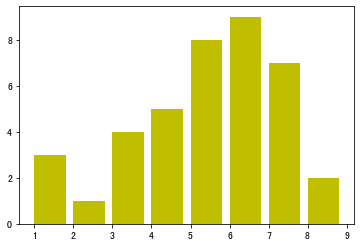

In [117]:
x = [i for i in range(1, 9)]
y = [3, 1, 4, 5, 8, 9, 7, 2]


plt.bar(x, y, align='edge', color='y');

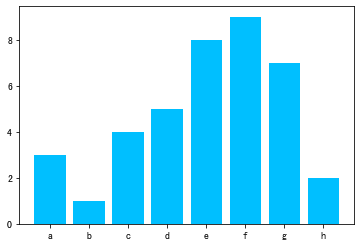

In [31]:
tick_name = [chr(i) for i in range(97, 97+len(x))]
plt.bar(x, y, color='deepskyblue', tick_label=tick_name);

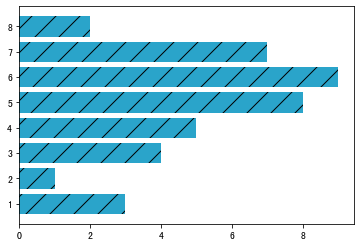

In [124]:
plt.barh(x, y, hatch='/', color='#2AA4CA');

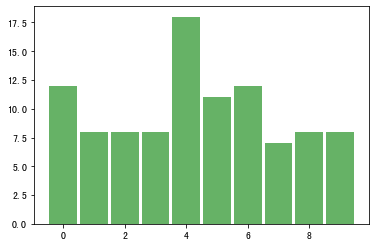

In [57]:
# Use plt.hist() to make bar chart
x = np.random.randint(0, 10, 100)
bins = range(0, 11)
plt.hist(x, bins=bins, align='left', color='g', histtype='bar', rwidth=.9, alpha=0.6);

In [137]:
pokemon = pd.read_csv("pokemon.csv")
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


#### 用sns.countplot()绘制统计柱状图

In [ ]:
# 用sns.countplot()绘制统计柱状图
base_color = sns.color_palette()[0] 

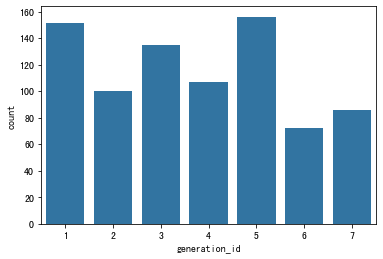

In [141]:
sns.countplot(data=pokemon, x='generation_id', color=base_color);

从高到低排列

In [148]:
# ordered as max to min
# static method to define the order (NOT recommended!!)
pokemon.generation_id.value_counts()

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

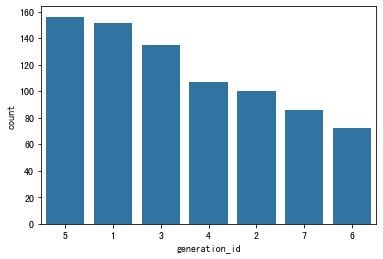

In [150]:
order = [5, 1, 3, 4, 2, 7, 6]

sns.countplot(data=pokemon, x='generation_id', color=base_color, order=order);

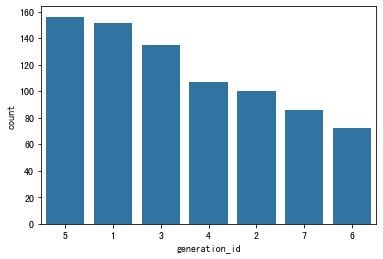

In [155]:
#  dynamic method to define the order (Recommended!!!)
order = pokemon.generation_id.value_counts().index.values
sns.countplot(data=pokemon, x='generation_id', color=base_color, order=order);

旋转刻度

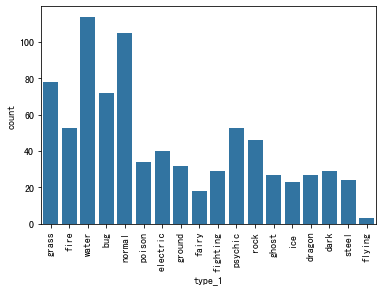

In [157]:
# Plot the Pokemon type on a Vertical bar chart
sns.countplot(data=pokemon, x='type_1', color=base_color);

# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90);

**Flip the axis**

In [161]:
pokemon['type_1'].value_counts()

water       114
normal      105
grass        78
bug          72
fire         53
psychic      53
rock         46
electric     40
poison       34
ground       32
fighting     29
dark         29
dragon       27
ghost        27
steel        24
ice          23
fairy        18
flying        3
Name: type_1, dtype: int64

In [160]:
# Plot the Pokemon type on a Horizontal bar chart
type_order = pokemon['type_1'].value_counts().index
type_order

Index(['water', 'normal', 'grass', 'bug', 'fire', 'psychic', 'rock',
       'electric', 'poison', 'ground', 'fighting', 'dark', 'dragon', 'ghost',
       'steel', 'ice', 'fairy', 'flying'],
      dtype='object')

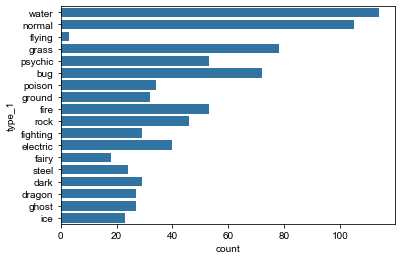

In [217]:
sns.countplot(data=pokemon, y='type_1', color=base_color, order=type_order);

**Rescale the axis to relative frequency**

In [205]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [207]:
# melt (unpivot) the type_1 and type_2 column
pkmn_types = pokemon.melt(id_vars=['id', 'species'], 
                          value_vars=['type_1', 'type_2'], 
                          var_name='type_level', 
                          value_name='type')

pkmn_types[:10]

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


In [210]:
# the rows will be expanded as 2 time as the original
print("Before melt: {0}. After melt: {1}".format(pokemon.shape, pkmn_types.shape))

Before melt: (807, 14). After melt: (1614, 4)


In [211]:
# Count the frequency of unique values in the `type` column of pkmn_types dataframe. 
# By default, returns the decreasing order of the frequency.
type_counts = pkmn_types['type'].value_counts()
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [212]:
# Get the unique values of the `type` column, in the decreasing order of the frequency.
type_order = type_counts.index
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')

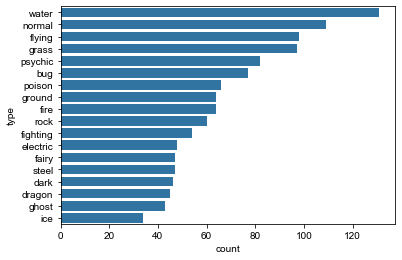

In [218]:
# Plot the horizontal bar charts
sns.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

In [220]:
# Returns the sum of all not-null values in `type` column
n_pokemon = pkmn_types['type'].value_counts().sum()

# Return the highest frequency in the `type` column
max_type_count = type_counts[0]

# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_type_count / n_pokemon
print(max_prop)

# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
# between 0 and max_prop, with a step size 2%
tick_props = np.arange(0, max_prop, 0.02)
print(tick_props)

0.10808580858085809
[0.   0.02 0.04 0.06 0.08 0.1 ]


In [221]:
# Use a list comprehension to create tick_names that we will apply to the tick labels. 
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` is used to represent floating point number.
# Refer [here](https://docs.python.org/2/library/string.html#format-string-syntax) for more details
tick_names = ['{:.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

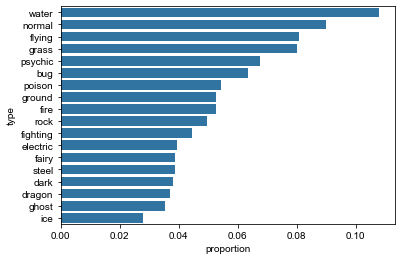

In [223]:
sns.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

# Change the tick locations and labels
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');

**Add text of value right to the each bar**

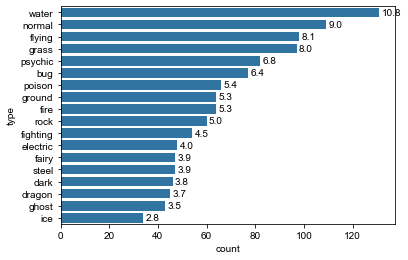

In [226]:
sns.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

type_counts = pkmn_types['type'].value_counts()

# Logic to print the proportion text on the bars
for i in range (type_counts.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = type_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:.1f}'.format(100*count/n_pokemon)
    # Print the string value on the bar. 
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center')

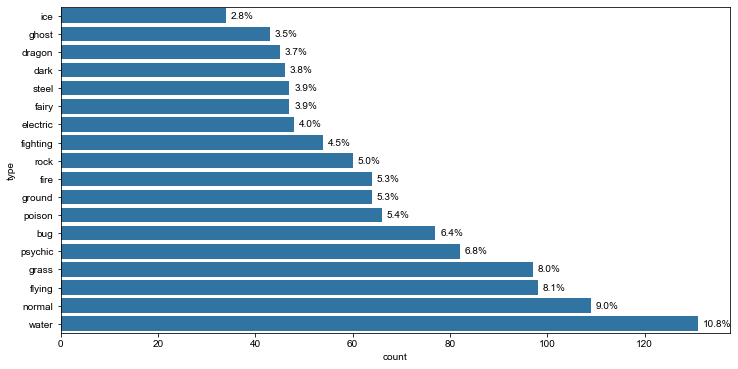

In [238]:
# Add 'pct' sign and in ascending order
plt.figure(figsize=(12, 6))

type_order = pkmn_types['type'].value_counts(ascending=True).index

sns.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

type_counts = pkmn_types['type'].value_counts(ascending=True)

for i in range (type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:.1f}%'.format(100*count/n_pokemon)
    plt.text(count+1, i, pct_string, va='center')

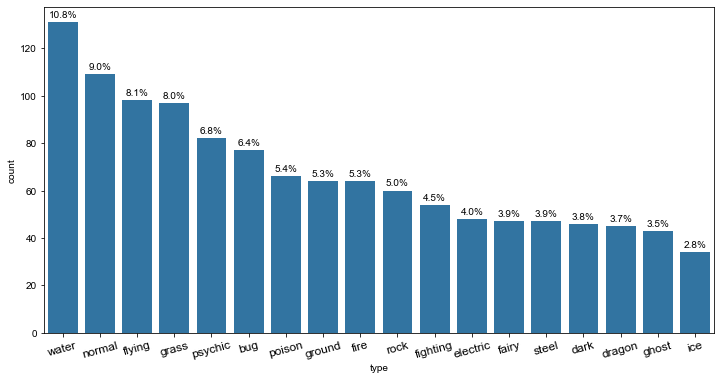

In [263]:
plt.figure(figsize=(12, 6))

type_order = pkmn_types['type'].value_counts().index

sns.countplot(data=pkmn_types, x='type', color=base_color, order=type_order);

plt.xticks(rotation=15, fontsize=12);

type_counts = pkmn_types['type'].value_counts()

for i in range (type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:.1f}%'.format(100*count/n_pokemon)
    plt.text(i, count+2, pct_string, ha='center')

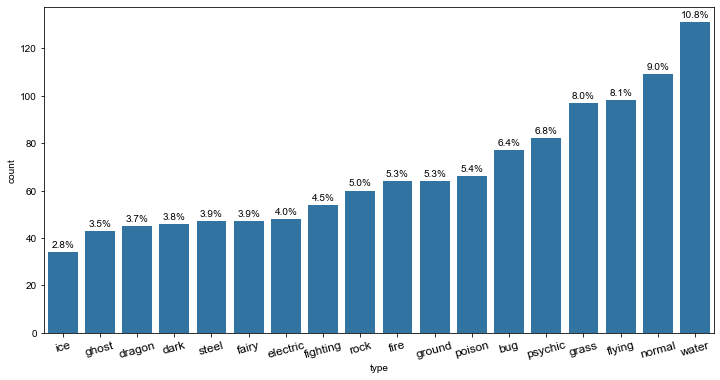

In [270]:
# In ascending order
plt.figure(figsize=(12, 6))

# count statistics in ascending order
pkmn_asc = pkmn_types['type'].value_counts(ascending=True)

# index of count statistics in ascending order for xticks
idx_asc = pkmn_asc.index

sns.countplot(data=pkmn_types, x='type', color=base_color, order=idx_asc);

plt.xticks(rotation=15, fontsize=12);

for i in range (pkmn_asc.shape[0]):
    count = pkmn_asc[i]
    pct_string = '{:.1f}%'.format(100*count/n_pokemon)
    plt.text(i, count+2, pct_string, ha='center')

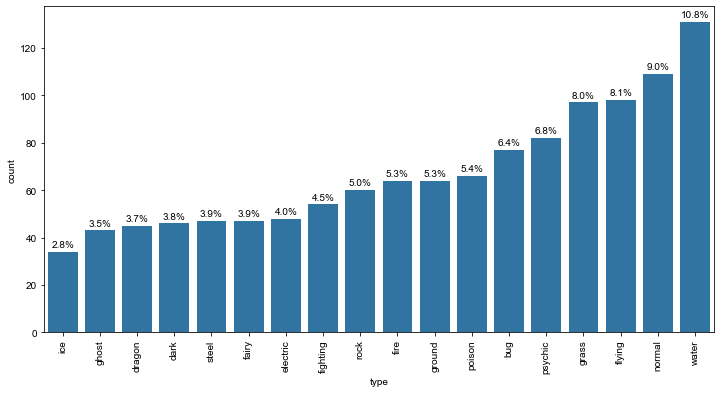

In [272]:
# Method 2
# Considering the same chart from the Example 1 above, print the text (proportion) BELOW the bars
plt.figure(figsize=(12, 6))
sns.countplot(data=pkmn_types, x='type', color=base_color, order=type_order);


# Recalculating the type_counts just to have clarity.
type_counts = pkmn_types['type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

**Counting missing data**

In [293]:
os.getcwd()

'/Users/alejandrosanz/Downloads/projects_on_GitHub/data_viz/Visualization_with_mpl_and_sns'

In [295]:
sales_data = pd.read_csv('sales-data.csv')
sales_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [296]:
sales_data.isnull()  # same as df.isna()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,False,False,False,False,True,True,True,True,True,False,False,False
1,False,False,False,False,True,True,True,True,True,False,False,False
2,False,False,False,False,True,True,True,True,True,False,False,False
3,False,False,False,False,True,True,True,True,True,False,False,False
4,False,False,False,False,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,False,False,False,False,False,False,False,False,False,True,True,False
8186,False,False,False,False,False,False,False,False,False,True,True,False
8187,False,False,False,False,False,False,False,False,False,True,True,False
8188,False,False,False,False,False,False,False,False,False,True,True,False


In [304]:
# check how may nulls in each column (feature)
null_stat = sales_data.isnull().sum()
null_stat

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

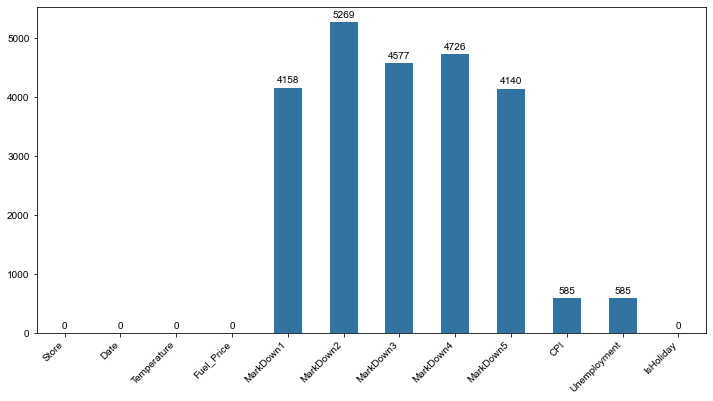

In [325]:
x = null_stat.index
y = null_stat.values

plt.figure(figsize=(12, 6))

ax = sns.barplot(x=x, y=y, color=sns.color_palette()[0])

# define a function to change the width of the bar in sns.barplot()
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .5)

# Logic to print value on each bar
for i in range (null_stat.shape[0]):
    count = null_stat[i]

    # Refer here for details of the text() - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html
    plt.text(i, count+200, count, ha = 'center', va='top')

plt.xticks(rotation=45, ha='right');

**Define a Categorical data type**

In [163]:
cat_type = pd.api.types.CategoricalDtype(['Strongly Disagree', \
                                          'Disagree', \
                                          'Neither Agree nor Disagree', \
                                          'Agree', \
                                          'Strongly Agree'], \
                                         ordered=True)


In [189]:
a = ['Strongly Disagree', 'Disagree', 'Neither Agree nor Disagree', 'Agree', 'Strongly Agree']
sample = np.random.choice(a, 1000)

In [190]:
data = pd.DataFrame(sample, columns=['attitude'], dtype=cat_type)
data.head()

,attitude
0,Agree
1,Neither Agree nor Disagree
2,Strongly Disagree
3,Strongly Agree
4,Strongly Agree


In [194]:
data.dtypes

attitude    category
dtype: object

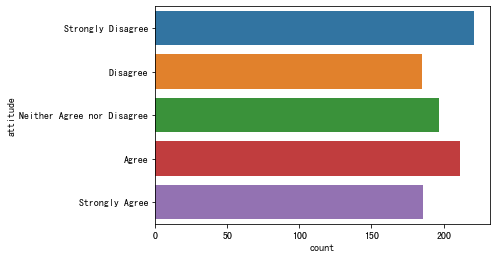

In [195]:
sns.countplot(data=data, y='attitude');

#### 用plt.bar()绘制统计柱状图

In [142]:
# Return the Series having unique values
x = pokemon['generation_id'].unique()
x

array([1, 2, 3, 4, 5, 6, 7])

In [143]:
# Return the Series having frequency count of each unique value
y = pokemon['generation_id'].value_counts(sort=False)
y

1    151
2    100
3    135
4    107
5    156
6     72
7     86
Name: generation_id, dtype: int64

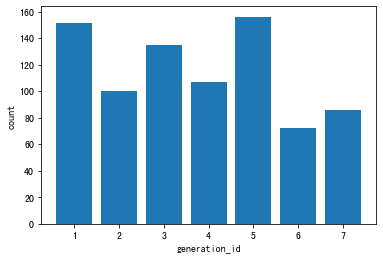

In [146]:
plt.bar(x, y)

# Labeling the axes
plt.xlabel('generation_id')
plt.ylabel('count');

In [ ]:
# Plot the Pokemon type on a Vertical bar chart
sb.countplot(data=pokemon, x='type_1', color=base_color);

# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90)

### Pie Chart

**A standard pie chart**
- start from the top of the circle
- plot each categorical level clockwise from most frequent to least frequent.

### Example 1: 

Plot a simple Pie chart about counts on `generation_id` of pokemon dataset.

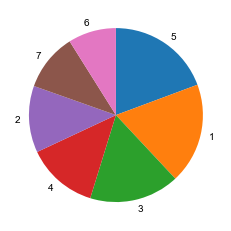

In [370]:
# Use the same pokemon dataset
pokemon = pd.read_csv('pokemon.csv')

sorted_counts = pokemon['generation_id'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);


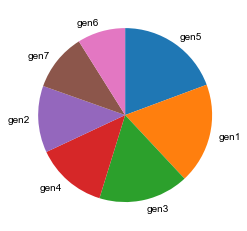

In [376]:
# Change the labels as `gen5`, `gen6`, `gen7` ...
labels1 = ["gen{}".format(i) for i in pokemon['generation_id'].value_counts().index]

plt.pie(sorted_counts, labels = labels1, startangle = 90, counterclock = False);

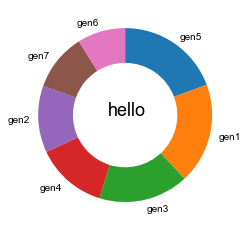

In [396]:
# Make a donut plot
plt.pie(sorted_counts, \
        labels = labels1, \
        startangle = 90, \
        counterclock = False, \
        wedgeprops={'width': 0.4})

plt.text(-.2, 0, s='hello', fontsize=18);

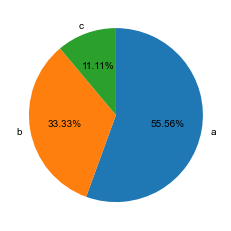

In [328]:
x = [5, 3, 1]

labels = ['a', 'b', 'c']

plt.pie(x, startangle=90, counterclock=False, labels=labels, autopct="%.2f%%");

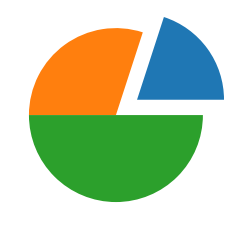

In [71]:
x = [2, 3, 5]

labels = ['a', 'b', 'c']

plt.pie(x, explode=[.3, 0, 0]);

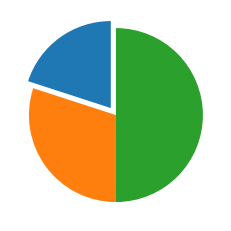

In [111]:
x = [2, 3, 5]

labels = ['a', 'b', 'c']

plt.pie(x, startangle=90, explode=[.1, 0, 0]);

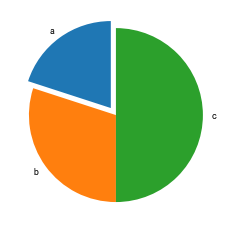

In [72]:
x = [2, 3, 5]

labels = ['a', 'b', 'c']

plt.pie(x, startangle=90, explode=[.1, 0, 0], labels=labels);

**Donut Plot**

Via adjusting `wedgeprops` to draw donut chart

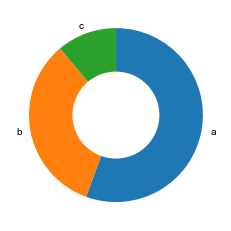

In [331]:
x = [5, 3, 1]

labels = ['a', 'b', 'c']

plt.pie(x, startangle=90, counterclock=False, labels=labels, wedgeprops={'width': 0.5});

In [ ]:
poke

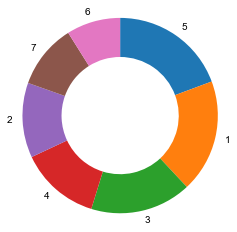

In [333]:
sorted_counts = pokemon['generation_id'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');

### Histograms

### Scatter Plot

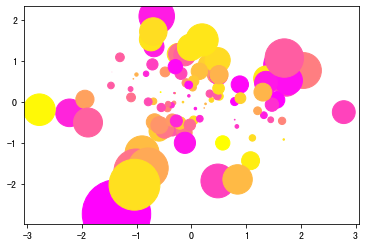

In [91]:
import matplotlib as mpl

a = np.random.randn(100)
b = np.random.randn(100)

plt.scatter(a, b, s=np.power(10*a+20*b, 2), c=np.random.rand(100), cmap=mpl.cm.spring);

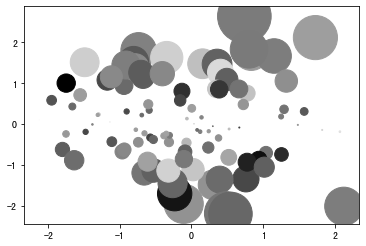

In [110]:
a = np.random.randn(100)
b = np.random.randn(100)

plt.scatter(a, b, s=np.power(a+20*b, 2), c=np.random.randn(100), cmap=mpl.cm.binary);

### Stem Plot

In [334]:
3600*24

86400

## Draw circles

### Example 1: Draw two cirlcles.

**CASE 1: The radius of one is twice as much as the other.** 

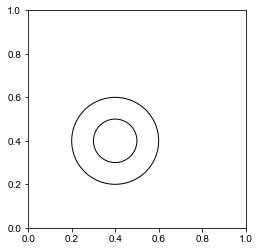

In [336]:
ax=plt.subplot(aspect='equal')

c1 = plt.Circle((.4, .4), .2, fill=False)
c2 = plt.Circle((.4, .4), .1, fill=False)

ax.add_patch(c1)
ax.add_patch(c2);

**CASE 2: The area of one is twice as much as the other.**

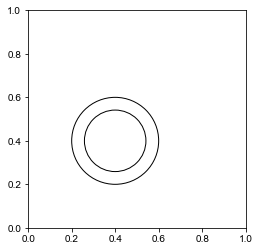

In [337]:
ax=plt.subplot(aspect='equal')

c1 = plt.Circle((.4, .4), .2, fill=False)
c2 = plt.Circle((.4, .4), .2*np.sqrt(2)/2, fill=False)

ax.add_patch(c1)
ax.add_patch(c2);

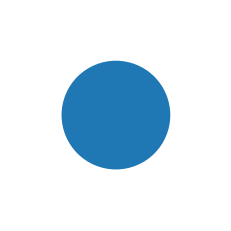

In [365]:
ax = plt.subplot()

c1 = plt.Circle((.4, .4), .2)

ax.add_patch(c1)

plt.axis('square')  # set equal scaling for x and y axis

plt.axis([0, .8, 0, .8])  # set limits to the axis

plt.axis(False);  # turns axis lines and labels off

In [366]:
plt.axis?

### Change Figure() and Axes() Color

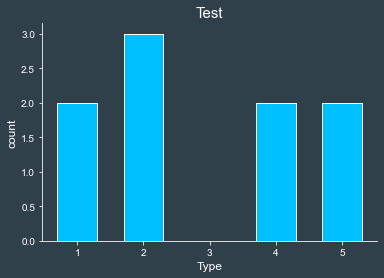

In [335]:
a = [1,1,2,2,2,4,4,5,5]
bins = np.arange(0.5, 6.5, 1)

fig = plt.figure()
fig.set_facecolor('#30404B')

plt.hist(a, bins=bins, rwidth=0.6, color = 'deepskyblue', edgecolor='w')

ax = plt.gca()
ax.set_facecolor('#30404B')
ax.spines['left'].set_color('w')
ax.spines['bottom'].set_color('w')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='x', colors='w')
ax.tick_params(axis='y', colors='w')

plt.title('Test', color='w', fontsize=15)
plt.xlabel('Type', color='w', fontsize=12)
plt.ylabel('count', color='w', fontsize=12);

### Demonstrate pyplot.sca() and pyplot.text() to generate a grid of subplots

<Figure size 1440x720 with 0 Axes>

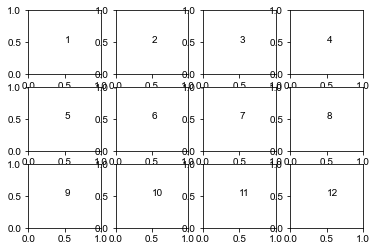

In [400]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes

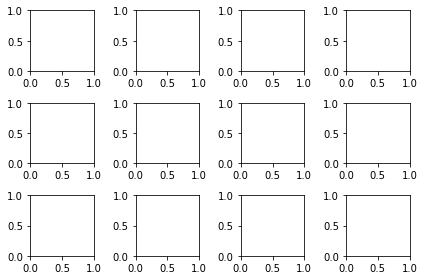

In [1]:
plt.subplots(3, 4)
plt.tight_layout();